# Bucket Sort

## Importando bibliotecas

In [1]:
import numpy as np
from time import perf_counter
from pandas import DataFrame
from seaborn import pointplot, set_style

# Constante
LISTA_DE_TAMANHOS = np.array([1000, 2000, 3000,
                              4000, 5000, 8000,
                              11_000, 15_000])

## Algoritmo

In [2]:
def bubble(arr:np.ndarray) -> None:
  i = 0
  n = len(arr)
  houve_troca = True
  while i < n-1 and houve_troca:
    i += 1
    houve_troca = False
    for j in range(n-1):
      if arr[j] > arr[j+1]:
        arr[j], arr[j+1] = arr[j+1], arr[j]
        houve_troca = True

def bucket(arr:'np.ndarray[int]') -> None:
  """Bucket Sort"""
  LEN_BUCKET = 10

  bucket_min, bucket_max = min(arr), max(arr)

  n_buckets = (bucket_max - bucket_min) // LEN_BUCKET + 1
  
  buckets_list = [[] for _ in range(n_buckets)]

  # Colocando elementos nos baldes
  for e in arr:
    pos = (e - bucket_min) // LEN_BUCKET
    buckets_list[pos].append(e)
  
  # Ordenando baldes
  pos = 0
  for balde in buckets_list:
    bubble(balde)
    for num in balde:
      arr[pos] = num
      pos += 1

## Bateria de testes de desempenho

In [5]:
data = dict()

for ordem in ['crescente', 'aleatoria', 'decrescente']:
  tempos = list()
  for tamanho in LISTA_DE_TAMANHOS:
    # Gerando amostra do teste
    if ordem == 'crescente':
      amostra = np.arange(tamanho, dtype=int)
    elif ordem == 'decrescente':
      amostra = np.arange(tamanho, dtype=int)[::-1].copy()
    else:
      amostra = np.random.randint(low=0, high=tamanho+1, size=tamanho)
    
    # testando performance
    start = perf_counter()
    bucket(amostra)
    stop = perf_counter()
    
    # salvando resultado
    tempos.append(stop - start)
  data[ordem] = tempos
data['tamanhos'] = LISTA_DE_TAMANHOS

df = DataFrame(data=data)
df.style.hide_index()

crescente,aleatoria,decrescente,tamanhos
0.012976,0.005299,0.004342,1000
0.013977,0.010451,0.010211,2000
0.008676,0.012994,0.014381,3000
0.005914,0.015699,0.015342,4000
0.007474,0.017439,0.019810,5000
0.010621,0.030159,0.028004,8000
0.030822,0.044608,0.040592,11000
0.041396,0.075749,0.060705,15000


## Resultados

O pior caso é quando a lista se encontra ordenada de forma aleatoria


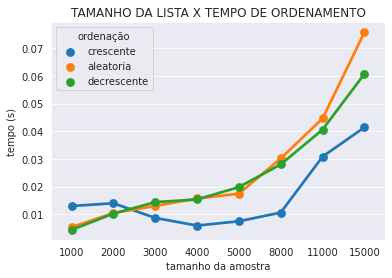

In [6]:
# Remodela o dataframe para uma versão longa mais fácil de plotar
long_df = df.melt(id_vars='tamanhos', var_name='ordenação', value_name='tempos')

set_style('darkgrid')
pointplot(
  data=long_df,
  x='tamanhos',
  y='tempos',
  hue='ordenação',
  ).set(
    xlabel='tamanho da amostra',
    ylabel='tempo (s)',
    title='TAMANHO DA LISTA X TEMPO DE ORDENAMENTO')

ordem = long_df.sort_values(by='tempos', ascending=False)['ordenação'].values[0]
print(f'O pior caso é quando a lista se encontra ordenada de forma {ordem}')